In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow import keras

In [2]:
df = pd.read_csv("../DATA/fake_reg.csv")

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


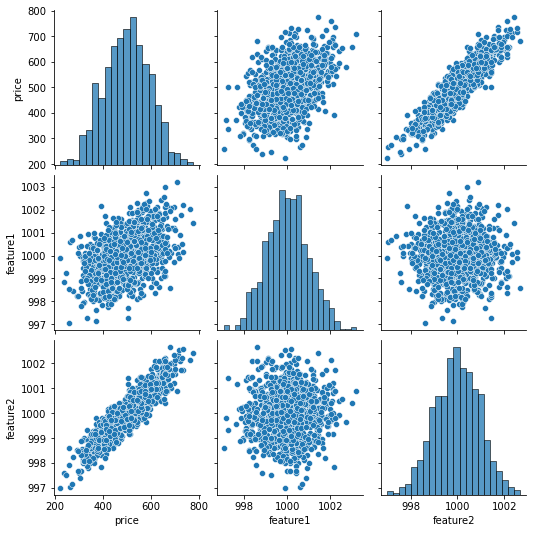

In [4]:
sns.pairplot(df)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1000.0,498.673029,93.785431,223.346793,433.025732,502.382117,564.921588,774.407854
feature1,1000.0,1000.014171,0.974018,997.058347,999.332068,1000.009915,1000.637580,1003.207934
feature2,1000.0,999.979847,0.948330,996.995651,999.316106,1000.002243,1000.645380,1002.666308


In [6]:
df.isnull().sum()

price       0
feature1    0
feature2    0
dtype: int64

### Data Preprocessing

In [7]:
from sklearn.model_selection import train_test_split

X = df[['feature1', 'feature2']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
X_train.shape

(700, 2)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(2, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(units=1))

model.compile(optimizer='rmsprop',
              loss='mse')

In [11]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=400)

Epoch 1/400
22/22 [==============================] - 1s 8ms/step - loss: 257320.7812 - val_loss: 256768.1406
Epoch 2/400
22/22 [==============================] - 0s 2ms/step - loss: 257190.3750 - val_loss: 256640.5000
Epoch 3/400
22/22 [==============================] - 0s 2ms/step - loss: 257054.4844 - val_loss: 256496.6875
Epoch 4/400
22/22 [==============================] - 0s 2ms/step - loss: 256900.2344 - val_loss: 256335.5781
Epoch 5/400
22/22 [==============================] - 0s 2ms/step - loss: 256728.6875 - val_loss: 256155.2031
Epoch 6/400
22/22 [==============================] - 0s 2ms/step - loss: 256535.9531 - val_loss: 255952.9375
Epoch 7/400
22/22 [==============================] - 0s 3ms/step - loss: 256321.2188 - val_loss: 255730.7500
Epoch 8/400
22/22 [==============================] - 0s 3ms/step - loss: 256086.7031 - val_loss: 255484.9062
Epoch 9/400
22/22 [==============================] - 0s 2ms/step - loss: 255827.5625 - val_loss: 255214.6875
Epoch 10/400
22/22 

In [12]:
predictions = pd.Series(model.predict(X_test, verbose=0).reshape(300,))

In [13]:
true_values = pd.DataFrame(y_test)

true_values.reset_index(drop=True, inplace=True)
predictions.reset_index(drop=True, inplace=True)

predict_true = pd.concat([predictions, true_values], axis=1)

predict_true.columns = ['True', 'Predictions']

predict_true

,True,Predictions
0,542.362061,540.743819
1,549.749390,551.650100
2,449.353027,446.612510
3,709.730225,711.657773
4,375.233704,369.914513
...,...,...
295,480.334167,483.134827
296,493.173004,496.754151
297,361.259735,357.342234
298,640.131409,637.271611


<AxesSubplot:xlabel='True', ylabel='Predictions'>

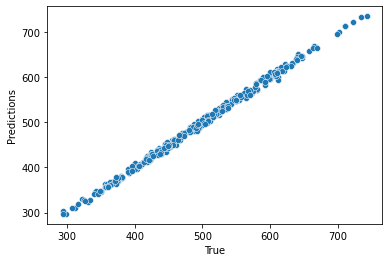

In [14]:
sns.scatterplot(data=predict_true, x='True', y='Predictions')

In [15]:
from sklearn.metrics import mean_squared_error, explained_variance_score

print(mean_squared_error(y_test, predictions))

26.117102156793152


In [16]:
errs = y_test.values.reshape(300,) - predictions

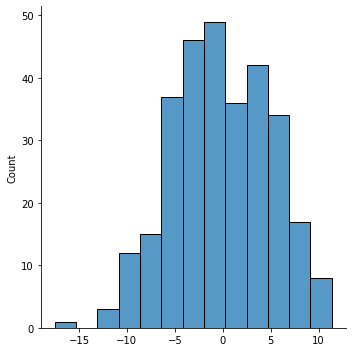

In [17]:
sns.displot(errs)

In [18]:
df

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531
...,...,...,...
995,476.526078,1000.018988,999.672732
996,457.313186,998.855379,1000.020026
997,456.720992,1001.451646,998.847606
998,403.315576,1000.771023,998.562851


In [19]:
trial = df.drop('price', axis=1).iloc[0]
trial = scaler.transform(trial.values.reshape(-1, 2))

model.predict(trial, verbose=0)

c:\Users\GGPC\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[470.72842]], dtype=float32)

In [20]:
new_features = [[200, 846]]

new_features = scaler.transform(new_features)
model.predict(new_features)

1/1 [==============================] - 0s 19ms/step


c:\Users\GGPC\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[123.43689]], dtype=float32)

In [21]:
explained_variance_score(y_test, predictions)

0.9969268565399125

### Save and load model

In [22]:
from tensorflow.keras.models import load_model

model.save('tf_syntax_basics.h5')
regress_model = load_model('tf_syntax_basics.h5')
regress_model.predict(trial)

1/1 [==============================] - 0s 57ms/step


array([[470.72842]], dtype=float32)